No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


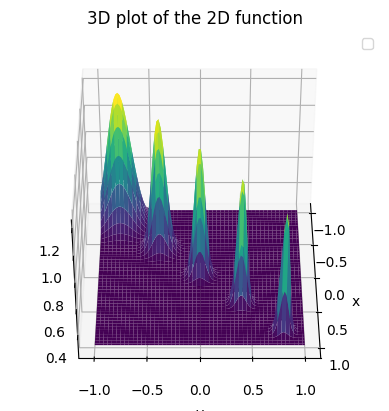

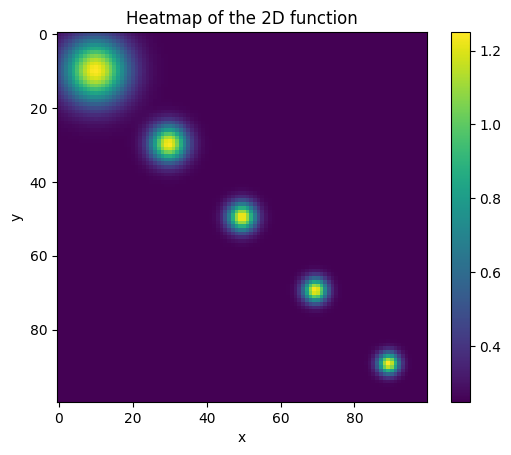

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
n_peak = 5
n_num_per_peak = 20
n_sample = n_peak * n_num_per_peak

# Create a grid of points
x = np.linspace(-1, 1, n_sample)
y = np.linspace(-1, 1, n_sample)
x_grid, y_grid = np.meshgrid(x, y)

# Define centers for the Gaussians
x_centers = 2/n_peak * (np.arange(n_peak) - n_peak/2 + 0.5)
y_centers = 2/n_peak * (np.arange(n_peak) - n_peak/2 + 0.5)

# Initialize the 2D function
f_xy = np.zeros_like(x_grid)

# Sum Gaussian functions with increased variance
scaling_factor = 70  # Decrease this factor to increase the variance
for i, (mu_x, mu_y) in enumerate(zip(x_centers, y_centers)):
    sigma_x = np.sqrt(1 / (1 + 2*i))
    sigma_y = np.sqrt(1 / (1 + 2*i))
    f_xy += np.exp(-((x_grid - mu_x)**2 / (2 * sigma_x**2) + (y_grid - mu_y)**2 / (2 * sigma_y**2)) * scaling_factor) + 0.05 #adding 0.05 for better clarity on graphs

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid, y_grid, f_xy, cmap='viridis')

#rotate the plot to see the 3D plot
ax.view_init(40, 0)
plt.legend()
plt.title('3D plot of the 2D function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#also show the heatmap next to the 3D plot
plt.imshow(f_xy, cmap='viridis')
plt.colorbar()
plt.title('Heatmap of the 2D function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [23]:
from tqdm import tqdm
train_data = []
train_labels = []

z = f_xy.flatten()

# Generate training data
for i in tqdm(range(8000)):
    sample = np.random.randint(0, 100*100)
    while sample in train_data:
        sample = np.random.randint(0, 100*100)
    train_data.append(sample)
    train_labels.append(z[sample])

train_data = np.array(train_data)
train_labels = np.array(train_labels)

test_data = [i for i in range(10000) if i not in train_data]
test_labels = [z[i] for i in test_data]

  0%|          | 0/8000 [00:00<?, ?it/s]

100%|██████████| 8000/8000 [00:00<00:00, 12078.99it/s]


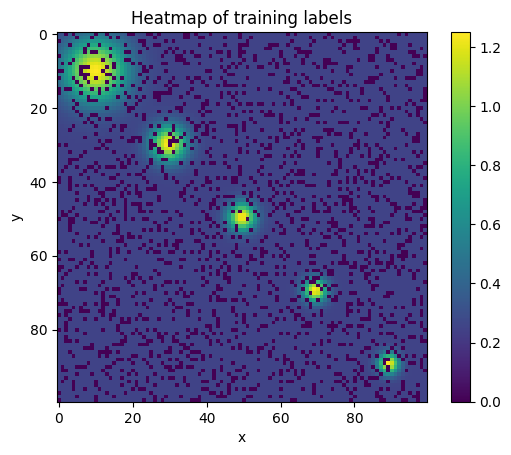

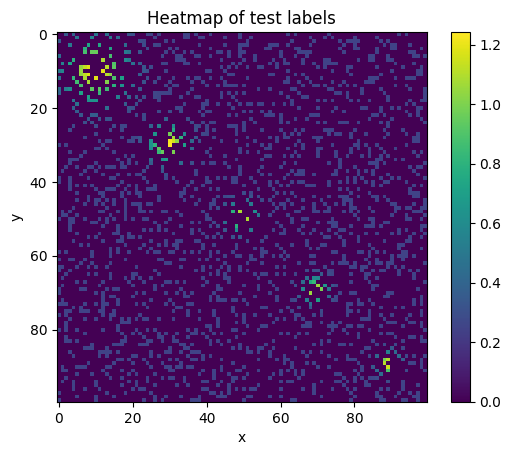

In [24]:
#heatmap of training labels
train_labels_heatmap = np.zeros((100, 100))

experience_train_data = {'1': [], '2': [], '3': [], '4': [], '5': []}
experience_train_labels = {'1': [], '2': [], '3': [], '4': [], '5': []}

for i, sample in enumerate(train_data):
    train_labels_heatmap[sample//100, sample%100] = train_labels[i]
    x = sample//10000
    experience_train_data[str(int(x)+1)].append((sample//100, sample%100))
    experience_train_labels[str(int(x)+1)].append(train_labels[i])
plt.imshow(train_labels_heatmap, cmap='viridis')
plt.colorbar()
plt.title('Heatmap of training labels')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

experience_test_data = []
experience_test_labels = []

#heatmap of test labels
test_labels_heatmap = np.zeros((100, 100))
for i, sample in enumerate(test_data):
    test_labels_heatmap[sample//100, sample%100] = test_labels[i]
    x = sample//10000
    experience_test_data.append((sample//100, sample%100))
    experience_test_labels.append(test_labels[i])
plt.imshow(test_labels_heatmap, cmap='viridis')
plt.colorbar()
plt.title('Heatmap of test labels')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

checkpoint directory created: ./model
saving model version 0.0
Training on Experience 1
69 74
7 11
31 26
93 4
85 36
40 38
13 89
40 99
31 59
68 98
45 70
15 43
77 13
75 53
61 10
89 38
92 74
62 11
7 26
38 4
29 45
45 67
2 9
38 18
29 98
28 28
26 70
99 16
55 96
17 77
54 32
28 26
19 65
91 52
13 73
73 38
21 20
58 66
86 27
55 27
49 15
16 85
89 83
67 60
10 44
23 70
3 46
48 87
47 10
21 22
99 86
73 39
98 41
41 93
66 43
3 78
47 15
3 35
95 67
70 91
4 29
24 66
38 82
99 52
84 70
56 92
6 94
88 91
79 26
51 68
99 7
28 58
58 91
23 65
82 92
2 25
65 13
57 55
3 9
34 75
61 68
89 80
51 64
12 50
80 38
24 19
71 28
60 24
83 33
90 96
3 66
57 88
12 93
63 12
88 20
61 64
2 28
13 1
9 43
69 93
24 20
35 81
21 10
41 94
7 21
86 1
43 48
39 56
61 91
2 46
89 41
69 86
33 40
32 58
75 58
27 60
82 93
14 36
1 37
86 58
17 41
29 21
9 89
87 82
72 21
37 72
4 58
19 1
13 91
78 57
18 32
86 15
7 59
33 81
75 74
60 7
9 99
43 39
90 48
97 64
54 30
1 98
51 34
49 96
46 88
39 16
72 19
91 36
14 5
19 69
52 54
73 54
12 83
17 60
25 59
64 40
97 23
9

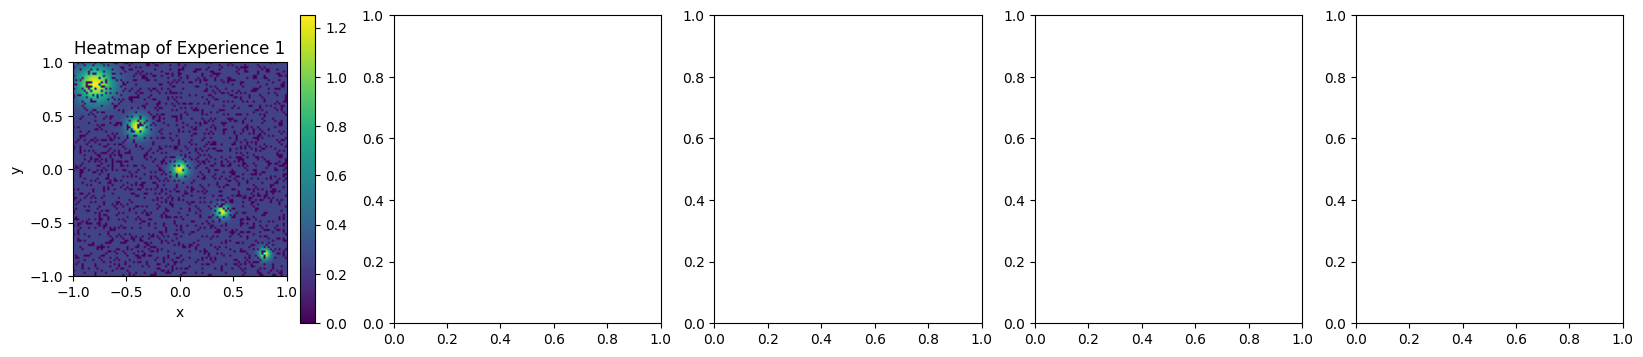

In [28]:
from kan import KAN
import torch

model = KAN(width=[2,5,1], grid=20, k=15, noise_scale=0.1, sp_trainable=False, sb_trainable=False)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

dataset = {}

dataset['test_input'] = torch.from_numpy(np.array(experience_test_data, dtype=np.float32).reshape(-1,2)).to(device)
dataset['test_label'] = torch.from_numpy(np.array(experience_test_labels, dtype=np.float32)).to(device)

fig, ax = plt.subplots(1, 5, figsize=(20, 4))
# Train the model
for i in range(1, 6):
    print(f'Training on Experience {i}')

    dataset['train_input'] = torch.from_numpy(np.array(experience_train_data[str(i)], dtype=np.float32).reshape(-1,2)).to(device)
    dataset['train_label'] = torch.from_numpy(np.array(experience_train_labels[str(i)], dtype=np.float32)).to(device)
    

    pred_heatmap = np.zeros((100, 100))
    for  sample,y in (zip(dataset['train_input'], dataset['train_label'])):
        pred_heatmap[int(sample[0]), int(sample[1])] = y.item()

    im = ax[i-1].imshow(pred_heatmap, cmap='viridis', extent=[-1, 1, -1, 1])
    ax[i-1].set_title(f'Heatmap of Experience {i}')
    ax[i-1].set_xlabel('x')
    ax[i-1].set_ylabel('y')
    fig.colorbar(im, ax=ax[i-1])
    break
    model.fit(dataset=dataset,opt='LBFGS', steps=10, update_grid=False)

    # Test the model
    print(f'Testing on Experience {i}')
    
    pred_heatmap = np.zeros((100, 100))

    x_grid = np.linspace(-1, 1, 100, dtype=np.float32)
    y_grid = np.linspace(-1, 1, 100, dtype=np.float32)

    mesh = np.meshgrid(x_grid, y_grid)
    mesh_tensor = torch.tensor(mesh).to(device).reshape(2, -1).T

    batch_size = 64  # Define an appropriate batch size
    num_points = mesh_tensor.shape[0]
    preds_list = []

    for i in range(0, num_points, batch_size):
        batch = mesh_tensor[i:i + batch_size]
        batch_preds = model(batch)
        preds_list.append(batch_preds)

    # Concatenate all predictions
    preds = torch.cat(preds_list, dim=0)

    for i in range(100):
        for j in range(100):
            x = x_grid[i]
            y = y_grid[j]
            pred_heatmap[i, j] = preds[i*100+j].item()

    plt.imshow(pred_heatmap, cmap='gist_heat')
    plt.colorbar()
    plt.title(f'Heatmap of predictions on Experience {i}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()    


    del preds_list, preds, mesh_tensor
    torch.cuda.empty_cache()
# plt.tight_layout()
# plt.show()

Training KAN

Prediction of KAN after each stage

In [ ]:
import ipywidgets as widgets 
from ipywidgets import interact, interactive, fixed 
# model.plot(beta=100)
layers = []
for layer in model.modules():
    layers.append(layer)

layer = layers[0]
print(layers)

def plot_curve_with_slider(j):
    x_conv, y_conv = layer[1].plot_curve(0, j, num_pts=100, num_extrapolate_bins=3)
    x_conv, y_conv = x_conv.cpu().numpy(), y_conv.cpu().numpy()
    plt.plot(x_conv, y_conv, label='Conv')
    plt.legend()
    plt.show()
# Create an interactive slider
interactive_plot = interactive(plot_curve_with_slider, j=widgets.SelectionSlider(options=[i for i in range(1)]))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot